# Benchmark visualizer

This notebook compares everyone's code performance.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns

import compare

# TODO: Move some of this stuff into compare.py
catppuccin_latte = {
    "rosewater": "#dc8a78",
    "flamingo":  "#dd7878",
    "pink":      "#ea76cb",
    "mauve":     "#8839ef",
    "red":       "#d20f39",
    "maroon":    "#e64553",
    "peach":     "#fe640b",
    "yellow":    "#df8e1d",
    "green":     "#40a02b",
    "teal":      "#179299",
    "sky":       "#04a5e5",
    "sapphire":  "#209fb5",
    "blue":      "#1e66f5",
    "lavender":  "#7287fd",

    # UI base
    "text":      "#4c4f69",
    "surface":   "#eff1f5",
    "overlay":   "#e6e9ef",
}

plt.rcParams.update({
    "figure.facecolor":   "white",
    "axes.facecolor":     "white",
    "savefig.facecolor":  "white",
    "text.color":         catppuccin_latte["text"],
    "axes.labelcolor":    catppuccin_latte["text"],
    "xtick.color":        catppuccin_latte["text"],
    "ytick.color":        catppuccin_latte["text"],
    "axes.edgecolor":     catppuccin_latte["text"],
})
sns.set_style("whitegrid", {
    "axes.facecolor": "white",
    "grid.color": catppuccin_latte["overlay"],
})

PALETTE = {
    "Bob in Python": catppuccin_latte["blue"],
    "Bram in Rust": catppuccin_latte["yellow"],
    "Brechtje in Python": catppuccin_latte["green"],
    "Sander in Haskell": catppuccin_latte["mauve"],
    "Vicky in Python": catppuccin_latte["red"],
}

def get_day(n : int) -> pd.DataFrame:
    return pd.DataFrame(compare.generate_day(n))

def plot_day(day: int, log_scale=False, violin=False):
    df = get_day(day)

    # unit detection
    if df["time"].max() < 1:
        unit = "ms"
        scale = 1000
    else:
        unit = "s"
        scale = 1

    # mutate in-place; nothing outside depends on it
    df["time_plot"] = df["time"] * scale
    df["author_lang"] = df["author"].str.capitalize() + " in " + df["lang"]

    fig, ax = plt.subplots(figsize=(13, 8))

    plot_func = sns.violinplot if violin else sns.boxplot
    plot_func(
        data=df,
        x="part",
        y="time_plot",
        hue="author_lang",
        ax=ax,
        palette=PALETTE,
    )

    if log_scale:
        ax.set_yscale("log")
        ax.yaxis.set_major_locator(mticker.LogLocator(base=10, numticks=50))
        ax.yaxis.set_minor_locator(mticker.LogLocator(base=10, subs=range(1, 10)))
        
        # draw major (10^n) lines
        for y in ax.get_yticks():
            if y > 0 and ax.get_ylim()[0] <= y <= ax.get_ylim()[1]:
                ax.axhline(y, linestyle="--", linewidth=0.6, color="gray")
    
        # draw minor (1–9 × 10^n) lines
        for y in ax.get_yticks(minor=True):
            if y > 0 and ax.get_ylim()[0] <= y <= ax.get_ylim()[1]:
                ax.axhline(y, linestyle="--", linewidth=0.4, color="gray")
    else:
        ax.set_ylim(bottom=0)
    
        # double the density: add minor ticks at midpoints
        ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    
        # draw major + minor lines
        for y in ax.get_yticks():
            ax.axhline(y, linestyle="--", linewidth=0.6, color="gray")
        for y in ax.get_yticks(minor=True):
            ax.axhline(y, linestyle="--", linewidth=0.4, color="gray")

    ax.set_xlabel("Puzzle Part")
    ax.set_ylabel(f"Execution Time ({unit})")
    ax.set_title(f"Advent of Code benchmarks day {day}")

    ax.legend(title="Made by")
    plt.tight_layout()
    plt.savefig(f"img/day{day}.png")
    plt.show()


## Day 1

This puzzle incorporated a dial and counting the number of clicks on each dial.

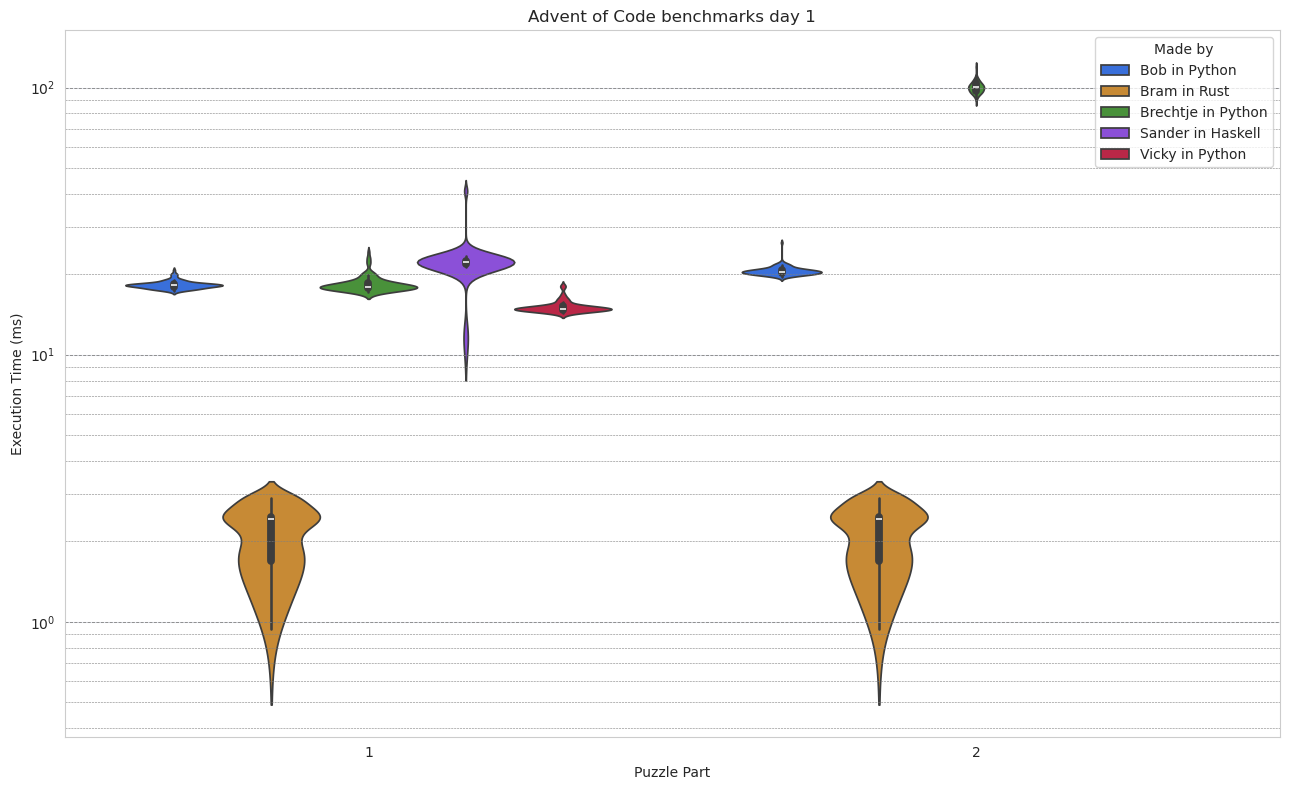

In [2]:
plot_day(1, log_scale=True, violin=True)

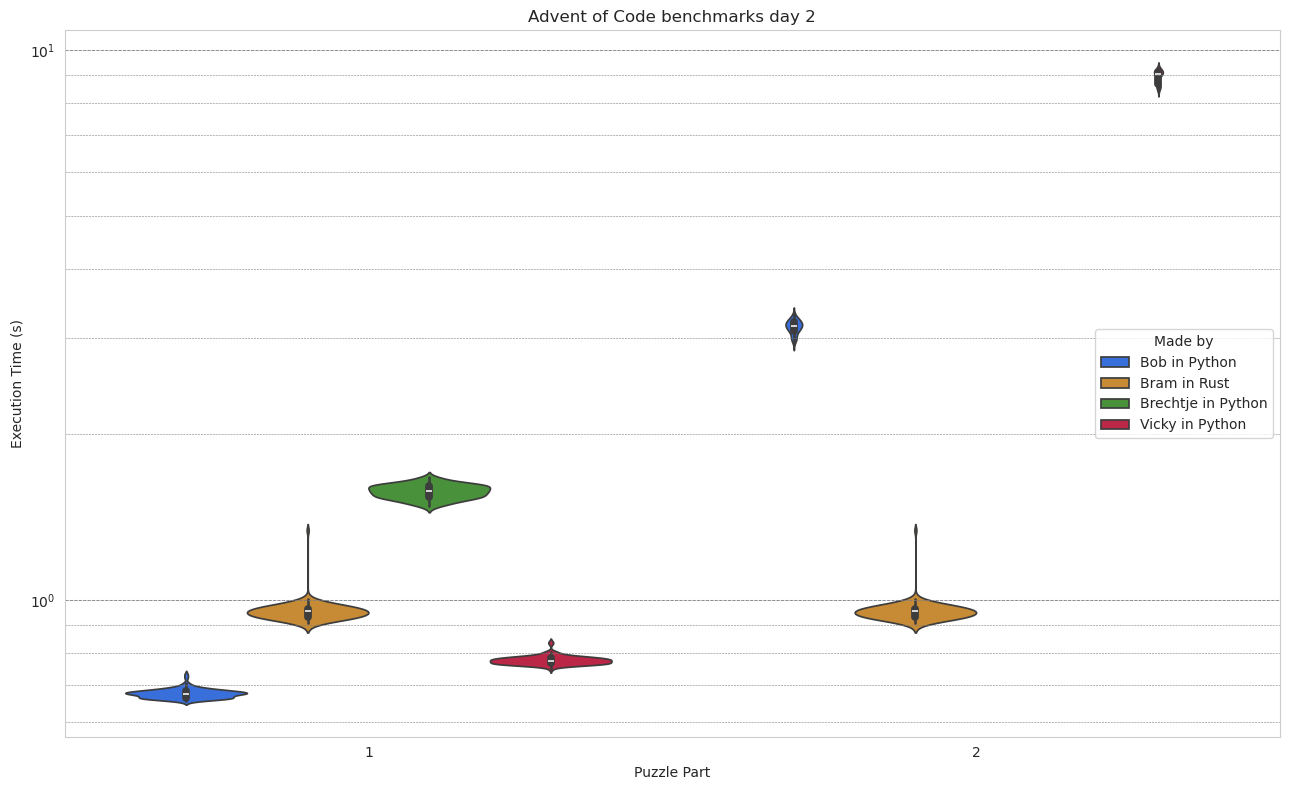

In [3]:
plot_day(2, log_scale=True, violin=True)